# The Sparks Foundation

## Data Science and Business Analytics (GRIP June21)

## Task 2 : Prediction using Unsupervised ML

## Author : Saloni Thete

***Problem statement:From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.***

### Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler, LabelEncoder

#importing visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pgo

### Loading the Dataset

In [3]:
iris = pd.read_csv('D:\saloni\saloni\iris.csv')
print("Dataset is Loaded")

Dataset is Loaded


In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#to get the information of data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.shape

(150, 6)

In [8]:
iris.isnull == True

False

### To know the flowers of each species

In [9]:
iris["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

### Analyze the Data

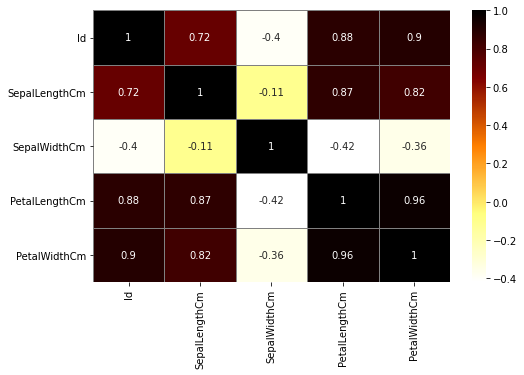

In [14]:
#to check the correlation(dependency) btw variables
plt.figure(figsize = (8, 5))
sns.heatmap(iris.corr(), linecolor = 'grey', linewidths = 1, cmap ='afmhot_r', annot = True)
plt.show()

#### Here,The darker ones are the highly correlated variables and the lighter ones are negatively corelated variables.

### Pairplot

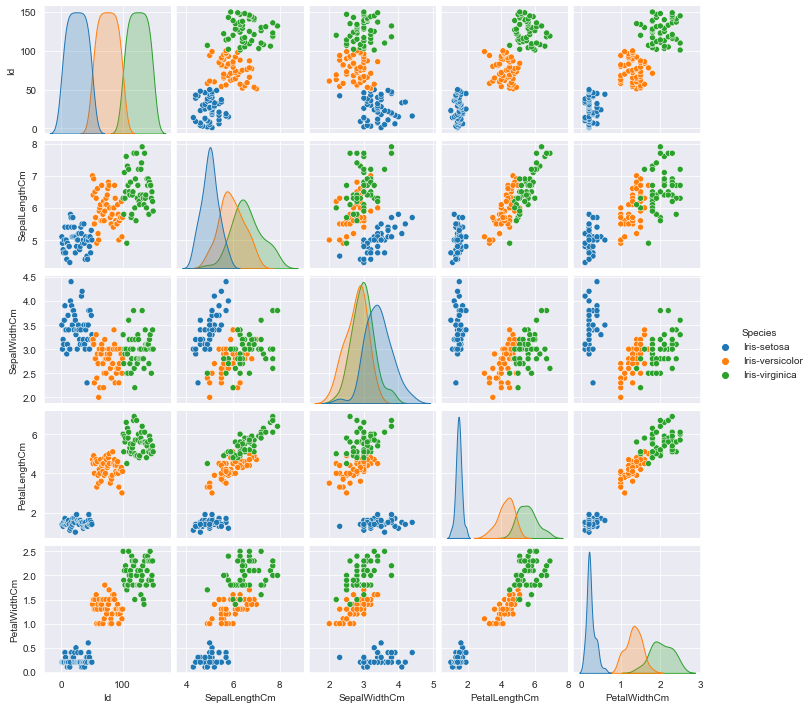

In [18]:
import seaborn as sns

iris1=iris.drop(["Id"],axis=1)
sns.set_style("darkgrid")
sns.pairplot(iris,hue="Species",height=2);
plt.show()

### Finding the optimum number of clusters for k-means clustering                                                                                 

### ELBOW METHOD

*To see optimum number of clusters, we will consider elbow method and then for each values of k computes an average scores for all clusters.*

Text(0, 0.5, 'WCSS')

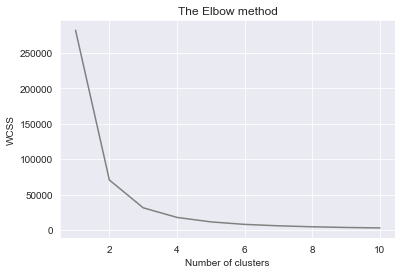

In [21]:
x = iris.iloc[:, [0, 1, 2, 3]].values


from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, color="grey")
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#### From the above graph,the optimum number of clusters is where the elbow occurs, i.e where the WCSS doesn't decrease significantly with every iteration. So we can choose the number of clusters as 3.

### K-Means Clustering

##### Create the K-Means Classifier

In [23]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
kmeans.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

##### Plotting the clusters

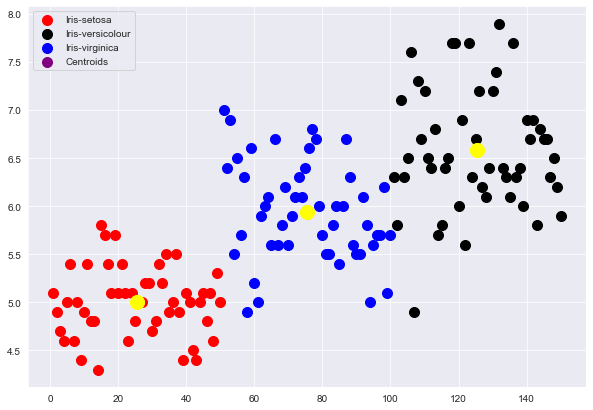

In [30]:
#Visualising the clusters
fig = plt.figure(figsize=(10, 7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'black', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'purple', label = 'Centroids')

plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
plt.show()

#### For k-means(k=3)

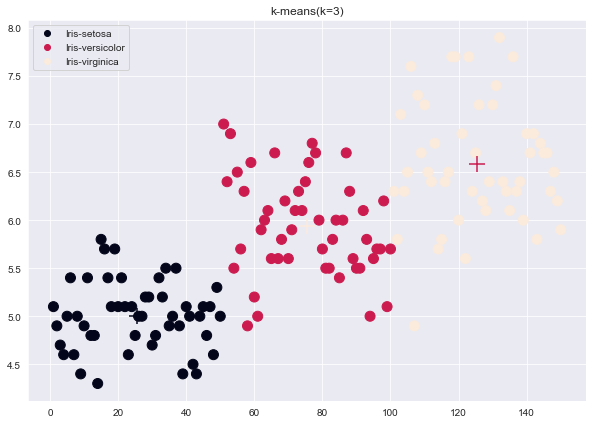

In [35]:
plt.figure(figsize=(10,7))
name_dict = {'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica' : 2}
colors = [name_dict[item] for item in iris['Species']]
s = plt.scatter(x[:,0],x[:,1],c=colors , s=100)

#identifying centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker = '+' , s=250 , c=[0,1,2] ,label = 'Centroids')
plt.legend(handles = s.legend_elements()[0] , labels = name_dict.keys())

plt.title('k-means(k=3)')
plt.show()


# Thank You!!